In [2]:
import tensorflow as tf 
import numpy as np 
from tensorflow import keras 
import os 
import math 
import random 
import pickle 
import glob
import matplotlib.pyplot as plt 
from collections import deque 
from tensorflow.keras import layers
import time 
import scipy.io as sio

from vehicle_model_variant import Environment 
from cell_model import CellModel 
# from driver_MDP import Driver_MDP 

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [5]:
driving_cycle_path = '../../OC_SIM_DB/OC_SIM_DB_Cycles/Highway/01_FTP72_fuds.mat'
driving_cycle = sio.loadmat(driving_cycle_path)
driving_cycle = driving_cycle["sch_cycle"][:, 1]
battery_path = "../../OC_SIM_DB/OC_SIM_DB_Bat/OC_SIM_DB_Bat_nimh_6_240_panasonic_MY01_Prius.mat"
motor_path = "../../OC_SIM_DB/OC_SIM_DB_Mot/OC_SIM_DB_Mot_pm_95_145_X2.mat"
cell_model = CellModel()

env = Environment(cell_model, driving_cycle, battery_path, motor_path, 10)

# Visualization Battery model 

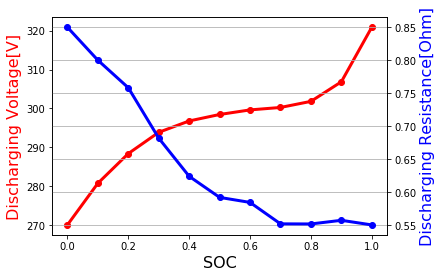

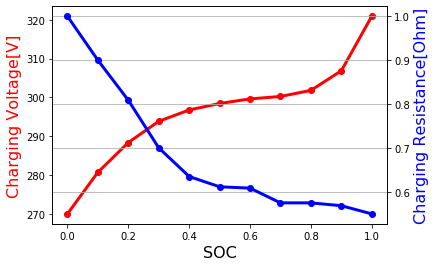

In [17]:
SOC_index = env.battery["SOC_ind"]
V_dis = env.battery["Vol_dis"]
V_cha = env.battery["Vol_cha"]
R_dis = env.battery["Res_dis"]
R_cha = env.battery["Res_cha"]


fig, ax = plt.subplots()
ax.plot(SOC_index, V_dis, color="red", linewidth=3, marker="o", label="Discharging Voltage[V]")
ax.set_xlabel("SOC", fontsize=16)
ax.set_ylabel("Discharging Voltage[V]", fontsize=16, color="red")
ax2 = ax.twinx() 
ax2.plot(SOC_index, R_dis, color="blue", linewidth=3, marker="o", label="Discharging Resistance[Ohm]")
ax2.set_ylabel("Discharging Resistance[Ohm]", fontsize=16, color="blue")
plt.grid() 
plt.savefig("Battery_discharging_character.png")

fig, ax = plt.subplots()
ax.plot(SOC_index, V_cha, color="red", linewidth=3, marker="o", label="Charging Voltage[V]")
ax.set_xlabel("SOC", fontsize=16)
ax.set_ylabel("Charging Voltage[V]", fontsize=16, color="red")
ax2 = ax.twinx() 
ax2.plot(SOC_index, R_cha, color="blue", linewidth=3, marker="o", label="Charging Resistance[Ohm]")
ax2.set_ylabel("Charging Resistance[Ohm]", fontsize=16, color="blue")
plt.grid() 
plt.savefig("Battery_charging_character.png")

#  Visualization FuelCell 

In [46]:
currents = np.linspace(0.0001, 2.4999, 100)

voltage_thermo = cell_model.get_thermo_voltage()
losses_ohmic, losses_act, losses_conc = [], [], [] 
voltages_net, powers = [], [] 

for cur in currents: 
    loss_ohmic, loss_act, loss_conc = cell_model.get_loss(cur)
    voltage_net = voltage_thermo - loss_ohmic - loss_act - loss_conc 
    power = voltage_net * cur 
    losses_ohmic.append(loss_ohmic)
    losses_act.append(loss_act)
    losses_conc.append(loss_conc)
    voltages_net.append(voltage_net)
    powers.append(power)

losses_act = np.array(losses_act)
losses_ohmic = np.array(losses_ohmic)
losses_conc = np.array(losses_conc)

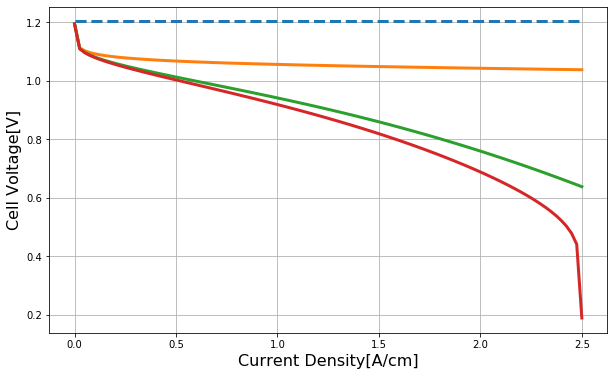

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(currents, np.full(len(currents), voltage_thermo), "--", linewidth=3, )
plt.plot(currents, voltage_thermo - losses_act, linewidth=3)
plt.plot(currents, voltage_thermo - losses_act - losses_ohmic, linewidth=3)
plt.plot(currents, voltage_thermo - losses_act - losses_ohmic - losses_conc, linewidth=3)
# plt.plot()
plt.grid() 
plt.xlabel("Current Density[A/cm]", fontsize=16)
plt.ylabel("Cell Voltage[V]", fontsize=16)
plt.savefig("Cell_Voltage_Character.png")

In [30]:
# Cell의 파워선도 그리기 

AttributeError: 'numpy.ndarray' object has no attribute 'full'

In [31]:
print(x) 

None
